#### Predict Default or Non-default

## Task

In this exercise, I will be using Logistic Regression, Tree Based models, and Ensemble models to predict whether a borrower will default based only on economic/financial capability features. These may or may not include amount income, amount credit, etc.

## Data
I will be using the [Home Credit dataset available on Kaggle](https://www.kaggle.com/c/home-credit-default-risk) in this exercise. [Home Credit](http://www.homecredit.net/about-us.aspx) is a financing company dedicated to providing loans to those with little or no credit history. 

 


## I. Imports

In [ ]:
# data processing and visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression
from sklearn import linear_model as lm, metrics, model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
reg = LogisticRegression(solver = 'lbfgs')

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None 

%matplotlib inline

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
# #import data set
# import os
# os.environ['KAGGLE_USERNAME'] = "carlodavid012" # username from the json file 
# os.environ['KAGGLE_KEY'] = "31cd4aee6befc6805c0f057d09ef2530" # key from the json file
# !kaggle competitions download -c home-credit-default-risk

In [3]:
!ls

application_test.csv.zip     HomeCredit_columns_description.csv
application_train.csv	     installments_payments.csv.zip
application_train.csv.zip    POS_CASH_balance.csv.zip
bureau_balance.csv.zip	     previous_application.csv.zip
bureau.csv.zip		     sample_data
credit_card_balance.csv.zip  sample_submission.csv.zip


In [4]:
!unzip application_train.csv.zip

Archive:  application_train.csv.zip
replace application_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
data = pd.read_csv('application_train.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
data.isnull().sum()

SK_ID_CURR                    0    
TARGET                        0    
NAME_CONTRACT_TYPE            0    
CODE_GENDER                   0    
FLAG_OWN_CAR                  0    
                             ..    
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
len(data)

307511

## II. Data Cleaning and EDA

In [12]:
# Determine and isolate features and target
df = data[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
               'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
               'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
               'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
               'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
               'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
               'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1',	'EXT_SOURCE_2',	'EXT_SOURCE_3', 'TARGET']]
               

# Check no of null values per field
df.isnull().sum()

NAME_CONTRACT_TYPE             0     
CODE_GENDER                    0     
FLAG_OWN_CAR                   0     
FLAG_OWN_REALTY                0     
CNT_CHILDREN                   0     
AMT_INCOME_TOTAL               0     
AMT_CREDIT                     0     
AMT_ANNUITY                    12    
AMT_GOODS_PRICE                278   
NAME_INCOME_TYPE               0     
NAME_EDUCATION_TYPE            0     
NAME_FAMILY_STATUS             0     
DAYS_BIRTH                     0     
DAYS_EMPLOYED                  0     
OCCUPATION_TYPE                96391 
CNT_FAM_MEMBERS                2     
REGION_RATING_CLIENT           0     
REGION_RATING_CLIENT_W_CITY    0     
AMT_REQ_CREDIT_BUREAU_HOUR     41519 
AMT_REQ_CREDIT_BUREAU_DAY      41519 
AMT_REQ_CREDIT_BUREAU_WEEK     41519 
AMT_REQ_CREDIT_BUREAU_MON      41519 
AMT_REQ_CREDIT_BUREAU_QRT      41519 
AMT_REQ_CREDIT_BUREAU_YEAR     41519 
EXT_SOURCE_1                   173378
EXT_SOURCE_2                   660   
EXT_SOURCE_3

In [13]:
# top missing columns
train_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
train_missing.head(20)

EXT_SOURCE_1                  0.563811
OCCUPATION_TYPE               0.313455
EXT_SOURCE_3                  0.198253
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_HOUR    0.135016
EXT_SOURCE_2                  0.002146
AMT_GOODS_PRICE               0.000904
AMT_ANNUITY                   0.000039
CNT_FAM_MEMBERS               0.000007
CNT_CHILDREN                  0.000000
AMT_CREDIT                    0.000000
AMT_INCOME_TOTAL              0.000000
TARGET                        0.000000
FLAG_OWN_REALTY               0.000000
FLAG_OWN_CAR                  0.000000
CODE_GENDER                   0.000000
dtype: float64

In [ ]:
#train_missing = train_missing.index[train_missing > 0.50]
#df1 = pd.get_dummies(df.drop(columns = train_missing))

In [15]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,Laborers,1.0,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.083037,0.262949,0.139376,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,Core staff,2.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,Laborers,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,Laborers,2.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,NaN,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,Core staff,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.322738,NaN,0


In [ ]:
#df1 = df1.drop('SK_ID_CURR', axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
OCCUPATION_TYPE                211120 non-null object
CNT_FAM_MEMBERS                307509 non-null float64
REGION_RATING_CLIENT   

In [ ]:
# # drop EXT_SOURCE_1
# df = df.drop('EXT_SOURCE_1', axis = 1)

In [19]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,Laborers,1.0,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.083037,0.262949,0.139376,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,Core staff,2.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,Laborers,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,Laborers,2.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,NaN,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,Core staff,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.322738,NaN,0


In [ ]:
df = df.dropna()

In [21]:
# Remove rows with null values
#df = df.dropna()

# Recheck if all fields contain zero null values
df.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
TARGET                         0
dtype: int64

In [22]:
df.shape

(82454, 28)

Text(0, 0.5, 'Count')

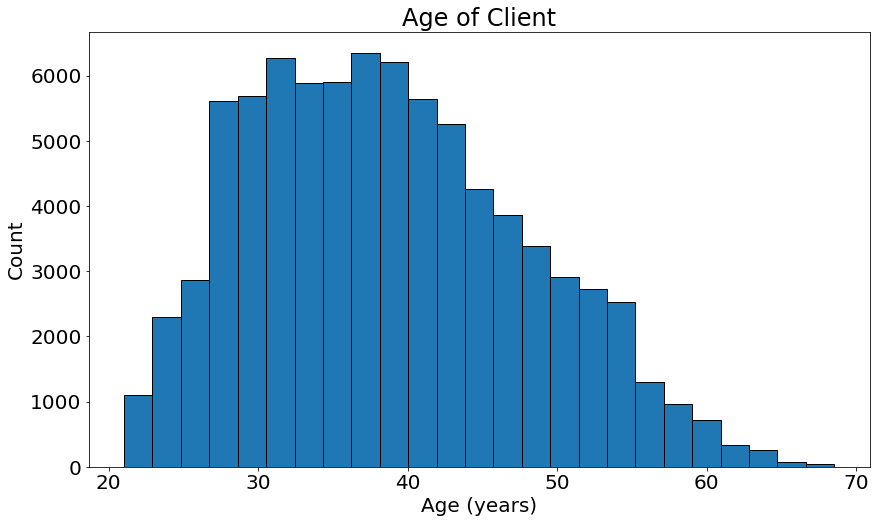

In [23]:
# # Visualize data distributions
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
plt.hist(abs(df['DAYS_BIRTH']) / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)') 
plt.ylabel('Count')




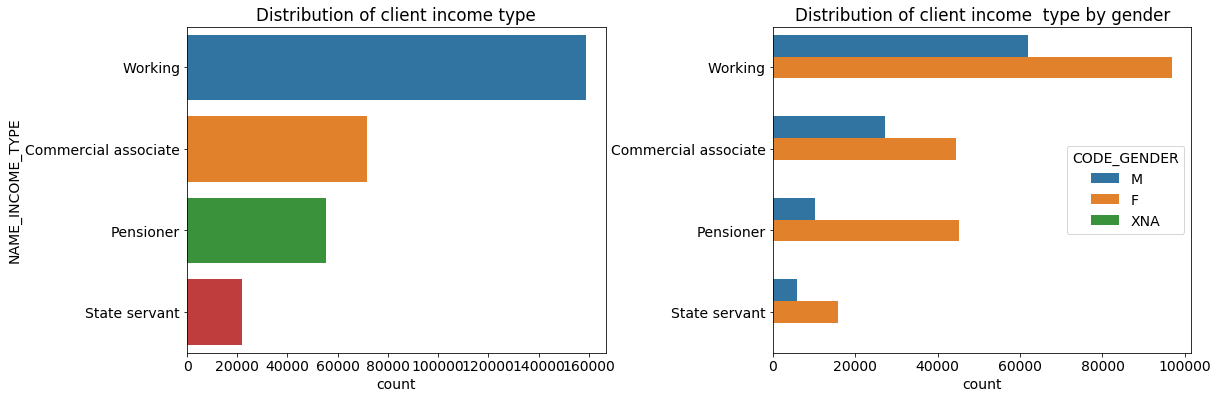

In [24]:
plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 14})

plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              hue=data["CODE_GENDER"],
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

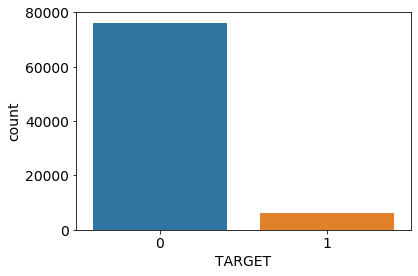

In [25]:
# # Show count of default and non-default (distribution)
sns.countplot(x="TARGET", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


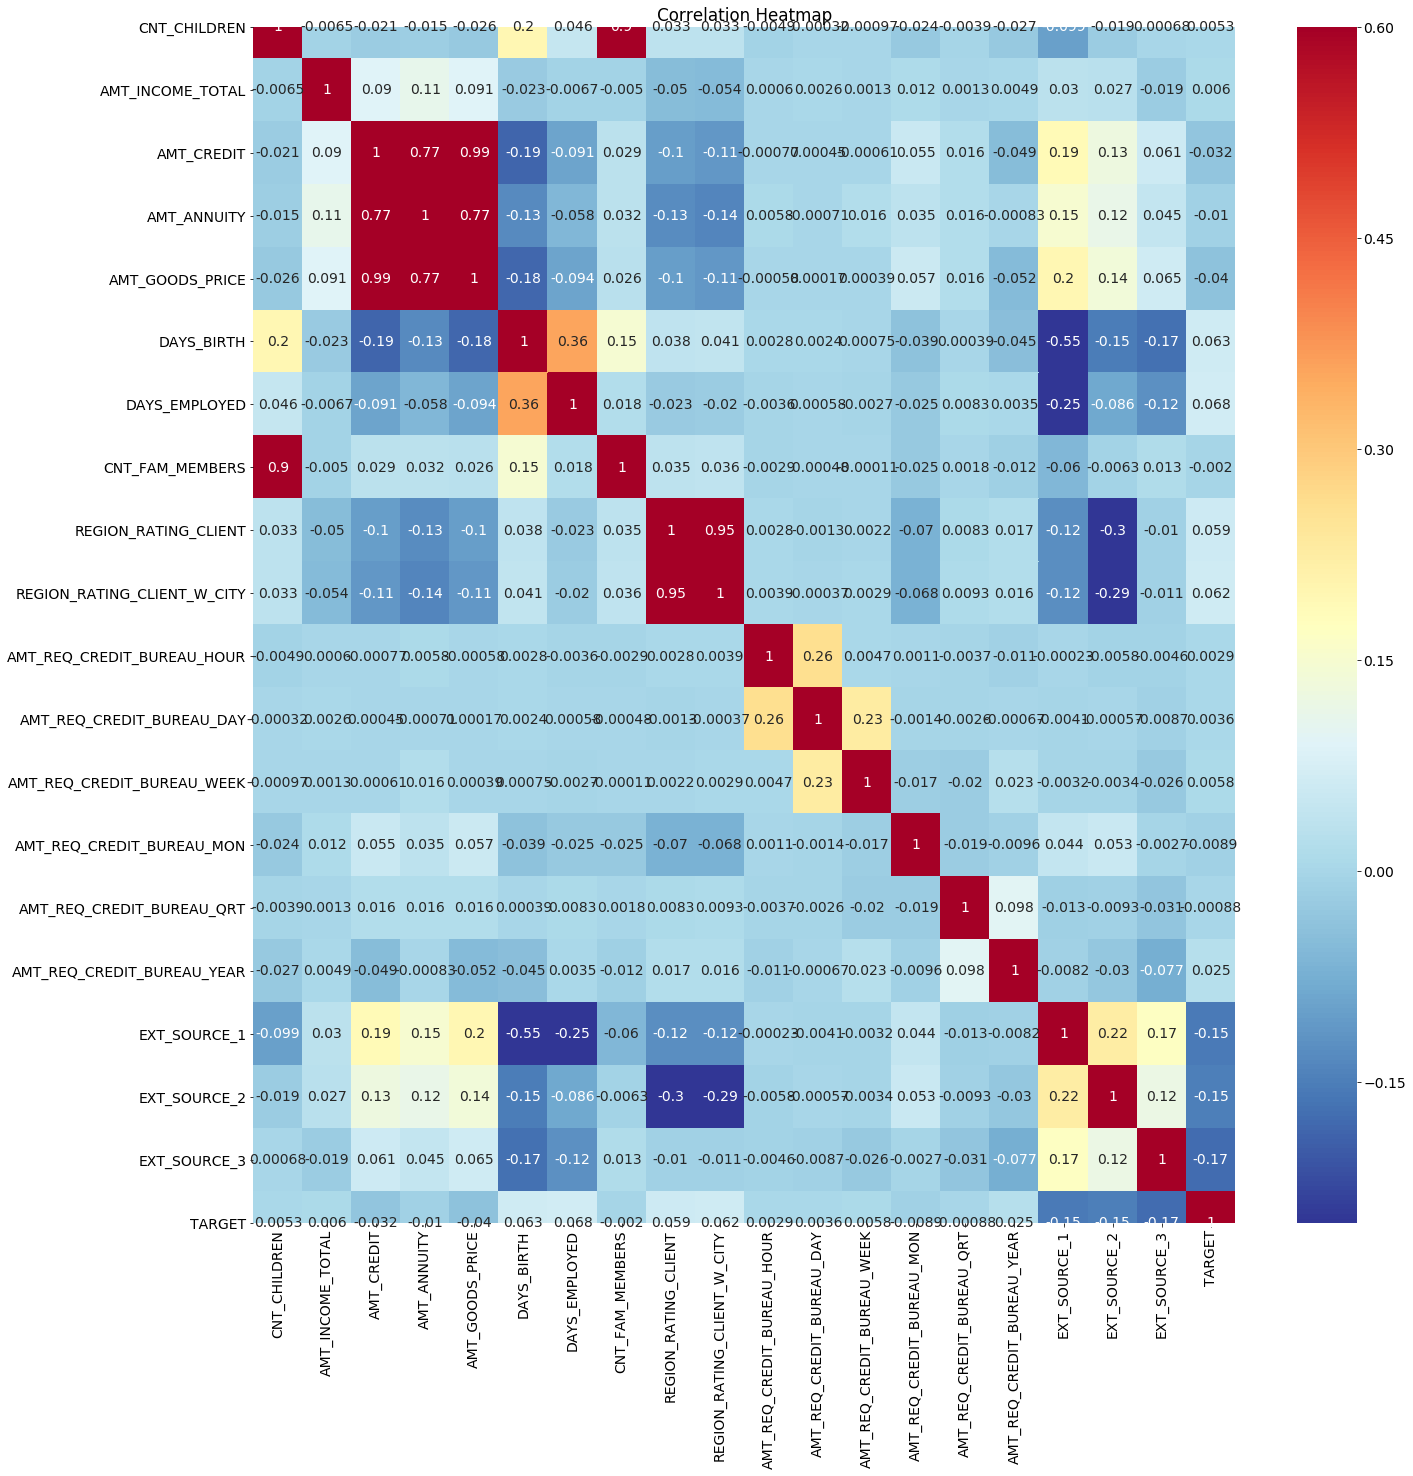

In [26]:
# Calculate and visualize correlations (relationships) between variables; heat map.

# Display correlations
plt.figure(figsize = (22, 22))

sns.heatmap(df.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [27]:
# remove collinear variables

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(10)


threshold = 0.75
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('number of columns to drop: ', len(to_drop))
print('columns to drop:', to_drop)


number of columns to drop:  4
columns to drop: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY']


In [ ]:
df = df.drop(to_drop, axis = 1)

In [29]:
df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET'],
      dtype='object')

In [ ]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

anomolous = df[df['DAYS_EMPLOYED'] == 365243].index
df = df.drop(index=anomolous)

In [31]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,9461,637,Laborers,2,0.0,0.0,0.0,0.0,0.0,1.0,0.083037,0.262949,0.139376,1
6,Cash loans,F,Y,Y,1,171000.0,1560726.0,Commercial associate,Higher education,Married,13778,3130,Accountants,2,0.0,0.0,0.0,1.0,1.0,2.0,0.774761,0.724000,0.492060,0
10,Cash loans,F,N,Y,1,112500.0,652500.0,Working,Higher education,Married,10197,679,Core staff,2,0.0,0.0,0.0,1.0,0.0,0.0,0.319760,0.651862,0.363945,0
12,Cash loans,F,N,Y,0,67500.0,80865.0,Working,Secondary / secondary special,Married,13439,2717,Laborers,2,0.0,0.0,0.0,1.0,0.0,0.0,0.464831,0.715042,0.176653,0
15,Cash loans,M,Y,Y,0,157500.0,299772.0,Working,Secondary / secondary special,Single / not married,8728,1157,Laborers,3,0.0,0.0,0.0,0.0,0.0,1.0,0.115634,0.346634,0.678568,0


In [ ]:
# # Convert categorical features into numerical using get pd.get_dummies
# df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
#                                              'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
#                                              'OCCUPATION_TYPE'])
df = pd.get_dummies(df)

In [ ]:
# df.head()

In [ ]:
# df.shape

## III. Run Logistic Regression

In [ ]:
# # Import SMOTE
# from imblearn.over_sampling import SMOTE

In [36]:
# # Split data to (1) Relevant features and (2) Target
features = df.drop(['TARGET'], axis=1)
target = df['TARGET']
target.shape

(82454,)

In [37]:
features.shape

(82454, 57)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: 

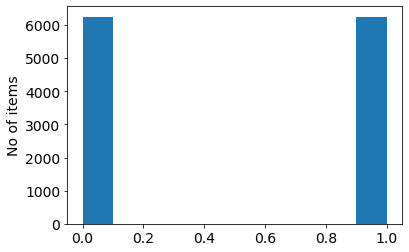

In [38]:
# handle imbalance dataset
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
X_sampled, y_sampled = rus.fit_resample(features, target)

plt.hist(y_sampled)
plt.ylabel('No of items')
plt.show()

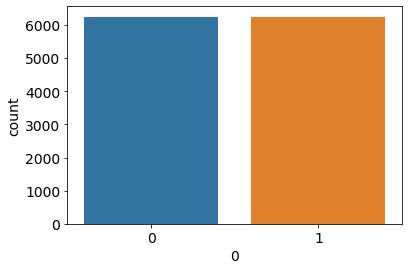

In [39]:
df2 = pd.DataFrame(y_sampled)
sns.countplot(x = 0,data = df2)

In [40]:
print(X_sampled.shape)
print(y_sampled.shape)

(12496, 57)
(12496,)


In [ ]:
# Split features and target to x and y train and test (Indicate % split to test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.10, random_state=12)

#feature scaling
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [42]:
# Check shape of x and y train and test
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)



(11246, 57)
(11246,)
(1250, 57)
(1250,)


In [ ]:
# Use SMOTE to balance your data
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)
# print('after smote: \n', np.bincount(y_train))

(array([5615.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5631.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

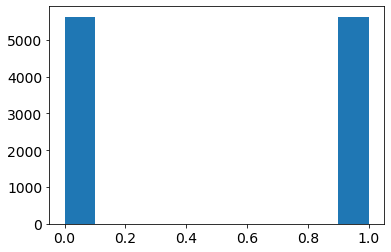

In [44]:
# Verify that target/label has been balanced
plt.hist(y_train)


In [ ]:
# Use logistic regression to fit default or non-default
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

# Assign a variable to your prediction using train data
train_pred = logreg.predict(X_train)

# Assign a variable to your prediction using test data
test_pred = logreg.predict(X_test)



In [46]:
# Obtain accuracy score of features to target with train data set
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.688


In [47]:
# Use classification report to view precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       633
           1       0.68      0.69      0.69       617

    accuracy                           0.69      1250
   macro avg       0.69      0.69      0.69      1250
weighted avg       0.69      0.69      0.69      1250



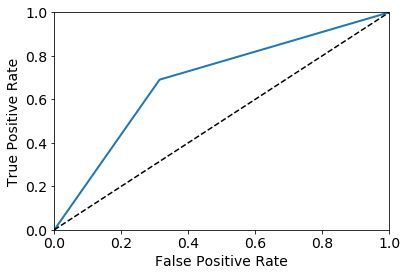

In [48]:
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# Precision or recall, which is more important? Explain why you chose that metric.


In [49]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

# Interpret the results
# What does each quarter/corner of the matrix mean?


array([[434, 199],
       [191, 426]])

## IV. Model Validation

In [ ]:
# Define 10 folds for stratified cross-validation
from sklearn import model_selection as ms
ten_fold_cv = ms.StratifiedKFold(n_splits=10, shuffle=True)


In [51]:
# Average AUC across folds
aucs = ms.cross_val_score(LogisticRegression(), features, target, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)


0.585828057519973

In [ ]:
# Split features and target to x and y train and test (Indicate % split to test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.10, random_state=12)

## V. Imports for Decision Tree

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


## VI. Run Decision Tree

In [54]:
# Run a decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Assess accuracy of predicted target with actual target
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))


0.688


In [55]:
# Use classification report to view precision and recall
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.61      0.58      0.59       633
           1       0.59      0.62      0.61       617

    accuracy                           0.60      1250
   macro avg       0.60      0.60      0.60      1250
weighted avg       0.60      0.60      0.60      1250



In [56]:
ten_fold_cv = ms.StratifiedKFold(n_splits=10, shuffle=True)
aucs = ms.cross_val_score(tree, features, target, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)

0.5392710743533502

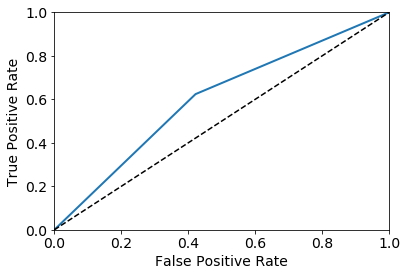

In [57]:
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       633
           1       0.65      0.58      0.61       617

    accuracy                           0.64      1250
   macro avg       0.64      0.64      0.64      1250
weighted avg       0.64      0.64      0.64      1250



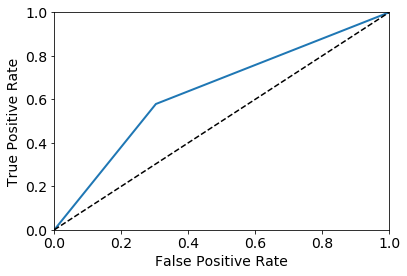

In [59]:
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
feature_importances = rfc.feature_importances_

feature_importances = pd.DataFrame({'feature': list(features.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [61]:
feature_importances.head(15)

,feature,importance
14,EXT_SOURCE_3,0.135662
13,EXT_SOURCE_2,0.115416
12,EXT_SOURCE_1,0.109158
4,DAYS_EMPLOYED,0.086352
3,DAYS_BIRTH,0.077349
2,AMT_CREDIT,0.075920
1,AMT_INCOME_TOTAL,0.058415
11,AMT_REQ_CREDIT_BUREAU_YEAR,0.038086
0,CNT_CHILDREN,0.021703
5,REGION_RATING_CLIENT,0.016202


In [62]:
aucs = ms.cross_val_score(rfc,features, target, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)

0.653264886273125

In [63]:
for n_trees in [2, 5, 10, 20, 50, 100]:
    aucs = ms.cross_val_score(RandomForestClassifier(n_estimators=n_trees), features, target, scoring='roc_auc', cv=ten_fold_cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs)))

  2 trees: mean AUC 56.20%
  5 trees: mean AUC 61.02%
 10 trees: mean AUC 65.49%
 20 trees: mean AUC 67.77%
 50 trees: mean AUC 71.16%
100 trees: mean AUC 72.65%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


### Adaboost

In [65]:
# Adaboost
ada_clf = AdaBoostClassifier(n_estimators=10)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       633
           1       0.69      0.66      0.67       617

    accuracy                           0.68      1250
   macro avg       0.68      0.68      0.68      1250
weighted avg       0.68      0.68      0.68      1250



In [66]:
for n_trees in [2, 5, 10, 20, 50, 100]:
    aucs = ms.cross_val_score(AdaBoostClassifier(n_estimators=n_trees), features, target, scoring='roc_auc', cv=ten_fold_cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs)))

  2 trees: mean AUC 67.61%
  5 trees: mean AUC 71.86%
 10 trees: mean AUC 73.17%
 20 trees: mean AUC 74.54%
 50 trees: mean AUC 75.09%
100 trees: mean AUC 75.17%


In [ ]:
feature_importances = ada_clf.feature_importances_

feature_importances = pd.DataFrame({'feature': list(features.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [68]:
feature_importances.head(15)

,feature,importance
14,EXT_SOURCE_3,0.4
13,EXT_SOURCE_2,0.2
12,EXT_SOURCE_1,0.2
16,NAME_CONTRACT_TYPE_Revolving loans,0.1
33,NAME_EDUCATION_TYPE_Secondary / secondary special,0.1
40,OCCUPATION_TYPE_Cleaning staff,0.0
43,OCCUPATION_TYPE_Drivers,0.0
42,OCCUPATION_TYPE_Core staff,0.0
41,OCCUPATION_TYPE_Cooking staff,0.0
0,CNT_CHILDREN,0.0


In [69]:
clf = GradientBoostingClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       633
           1       0.69      0.69      0.69       617

    accuracy                           0.69      1250
   macro avg       0.69      0.69      0.69      1250
weighted avg       0.69      0.69      0.69      1250



In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6927701434603045

In [71]:
for n_trees in [2, 5, 10, 20, 50, 100]:
    aucs = ms.cross_val_score(GradientBoostingClassifier(n_estimators=n_trees), features, target, scoring='roc_auc', cv=ten_fold_cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs)))

  2 trees: mean AUC 71.54%
  5 trees: mean AUC 72.45%
 10 trees: mean AUC 73.31%
 20 trees: mean AUC 74.04%
 50 trees: mean AUC 75.23%
100 trees: mean AUC 75.68%


### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model=xgb.XGBClassifier()

In [74]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100, seed=123)

xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

print(classification_report(y_test, preds))

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


              precision    recall  f1-score   support

           0       0.69      0.69      0.69       633
           1       0.68      0.68      0.68       617

    accuracy                           0.69      1250
   macro avg       0.69      0.69      0.69      1250
weighted avg       0.69      0.69      0.69      1250



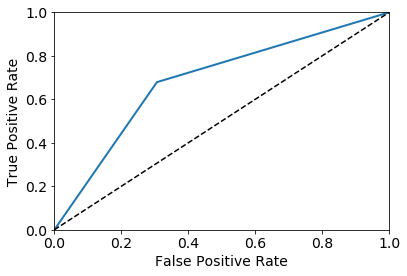

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, preds)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
feature_importances = xg_cl.feature_importances_

feature_importances = pd.DataFrame({'feature': list(features.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [77]:
feature_importances

,feature,importance
14,EXT_SOURCE_3,0.172910
13,EXT_SOURCE_2,0.086298
12,EXT_SOURCE_1,0.085492
30,NAME_EDUCATION_TYPE_Higher education,0.064525
15,NAME_CONTRACT_TYPE_Cash loans,0.043822
20,FLAG_OWN_CAR_N,0.040862
33,NAME_EDUCATION_TYPE_Secondary / secondary special,0.038558
17,CODE_GENDER_F,0.028848
4,DAYS_EMPLOYED,0.026703
2,AMT_CREDIT,0.026031
